In [1]:
from graphipy.graphipy import GraphiPy

In [2]:
# create GraphiPy object
graphipy = GraphiPy()

In [3]:
# The tumblr API needs these credentials
tumblr_api_credentials = {
    "consumer_key": ' ',
    "consumer_secret": ' ',
    "oauth_token": ' ',
    "oauth_secret": ' '
}

# create the tumblr object
tumblr = graphipy.get_tumblr(tumblr_api_credentials)

# Find Posts by a Tag

In [4]:
keyword = "python"

# Every function call modifies the graph that is sent as input
# tagged_posts = graphipy.create_graph()
# tumblr.fetch_posts_tagged(graph=tagged_posts, tag=keyword, limit=3)

# However, it also returns the graph modified so you can assign it to other variables like so:
tagged_posts = tumblr.fetch_posts_tagged(graph=graphipy.create_graph(), tag=keyword, limit=5)

In [5]:
# To get the list of available nodes
# There're posts and blogs in this case
print(tagged_posts.get_nodes().keys())

dict_keys(['post', 'blog'])


In [6]:
# You can get the dataframe from Pandas by specifying the node
tagged_posts_df = tagged_posts.get_df("post")

In [7]:
tagged_posts_df

,_id,Label,label_attribute,type,blog_name,post_url,slug,date,timestamp,state,...,can_reblog,can_send_in_message,can_reply,display_avatar,caption,photos,trail,reblog,body,title
0,180036144859,180036144859,post,photo,weprogrammingfan,https://weprogrammingfan.tumblr.com/post/18003...,ethical-hacking-with-python,2018-11-12 15:48:21 GMT,1542037701,published,...,True,True,True,True,<p>Ethical Hacking with Python<br/>\n☞ <a href...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'weprogrammingfan', 'active...",{'comment': '<p>Ethical Hacking with Python<br...,NaN,NaN
1,180035976515,180035976515,post,photo,pythononlineblog,https://pythononlineblog.tumblr.com/post/18003...,introduction-to-python-programming,2018-11-12 15:41:20 GMT,1542037280,published,...,True,True,True,True,<p>Introduction To Python Programming<br/>\n☞ ...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'pythononlineblog', 'active...",{'comment': '<p>Introduction To Python Program...,NaN,NaN
2,180035948612,180035948612,post,photo,djangodeveloper,https://djangodeveloper.tumblr.com/post/180035...,rails-django-and-nodejs-a-primer-on-web,2018-11-12 15:40:21 GMT,1542037221,published,...,True,True,True,True,"<p>Rails, Django, and Node.js: A Primer on Web...","[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'djangodeveloper', 'active'...","{'comment': '<p>Rails, Django, and Node.js: A ...",NaN,NaN
3,180035024633,180035024633,post,text,douchebagbrainwaves,https://douchebagbrainwaves.tumblr.com/post/18...,a-new-concept-of-variables,2018-11-12 15:01:39 GMT,1542034899,published,...,True,True,True,True,NaN,NaN,"[{'blog': {'name': 'douchebagbrainwaves', 'act...",{'comment': '<p>I realize we’re on dangerous g...,<p>I realize we&rsquo;re on dangerous ground h...,A NEW CONCEPT OF VARIABLES
4,180034461861,180034461861,post,photo,pybloggers,http://pybloggers.tumblr.com/post/180034461861...,how-to-publish-an-open-source-python-package-to,2018-11-12 14:38:25 GMT,1542033505,published,...,True,True,True,True,How to Publish an Open-Source Python Package t...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'pybloggers', 'active': Tru...",{'comment': '<p>How to Publish an Open-Source ...,NaN,NaN


In [8]:
# show the attributes of this node
tagged_posts_df.iloc[0]

_id                                                           180025916814
Label                                                         180025916814
label_attribute                                                       post
type                                                                 photo
blog_name                                                         blewgray
post_url                 https://blog.taylabg.com/post/180025916814/bie...
slug                         biennalepy-is-a-computer-virus-created-by-the
date                                               2018-11-12 07:00:33 GMT
timestamp                                                       1542006033
state                                                            published
format                                                                html
reblog_key                                                        TuExP3pu
tags                     [programming, python, venice biennale, art, vi...
short_url                

In [9]:
# The same works with edges
pb_edges = tagged_posts.get_edges()
print(pb_edges.keys())

dict_keys(['published'])


In [10]:
pb_edges["published"]

,Source,Target,Label,label_attribute,_id
0,blewgray,180025916814,PUBLISHED,PUBLISHED,blewgray180025916814PUBLISHED
1,pythononlineblog,180025855822,PUBLISHED,PUBLISHED,pythononlineblog180025855822PUBLISHED
2,weprogrammingfan,180025644531,PUBLISHED,PUBLISHED,weprogrammingfan180025644531PUBLISHED
3,hellocoding,180025232100,PUBLISHED,PUBLISHED,hellocoding180025232100PUBLISHED
4,douchebagbrainwaves,180022926223,PUBLISHED,PUBLISHED,douchebagbrainwaves180022926223PUBLISHED


# Find a Blog by Blog Name

In [11]:
# Let's try searching for a blog
blog_to_search = "pythonprogrammingthings"

In [12]:
# Call the appropriate function
blog = tumblr.fetch_blog(graphipy.create_graph(), blog_name=blog_to_search)

In [13]:
# You can get the dataframe from Pandas by specifying the node (only 1 node in this case)
blog_df = blog.get_df("blog")

In [14]:
blog_df

,_id,Label,label_attribute,name,title,description,url,uuid,updated
0,pythonprogrammingthings,Python Programming,blog,pythonprogrammingthings,Python Programming,,https://pythonprogrammingthings.tumblr.com/,t:74UBpGq-riXPEveOHMS6tw,1541998186


# Find Blogs followed by a Given Blog

In [15]:
# Let's use the blog name we used in the last section
blogs_following = tumblr.fetch_blogs_following(graphipy.create_graph(), blog_name=blog_to_search, limit=5)

# Grab the nodes
blogs_nodes = blogs_following.get_nodes()
print(blogs_nodes.keys())

dict_keys(['blog'])


In [16]:
# View the nodes
blogs_nodes["blog"]

,_id,Label,label_attribute,name,title,description,url,uuid,updated
0,pythonprogrammingthings,Python Programming,blog,pythonprogrammingthings,Python Programming,,https://pythonprogrammingthings.tumblr.com/,t:74UBpGq-riXPEveOHMS6tw,1541998186
1,haboushneil,"Neil Haboush - Montreal, Canada",blog,haboushneil,"Neil Haboush - Montreal, Canada","Neil Haboush (Montreal, Canada) creates the or...",https://haboushneil.tumblr.com/,t:1f0RS06xtbg90KoNd65qhg,1532500720
2,crimsonforge,CrimsonForge,blog,crimsonforge,CrimsonForge,,https://crimsonforge.tumblr.com/,t:of-WnR-IR2QP4nv8DqWwtQ,1519621994
3,aboutthecode,About the Code Inc.,blog,aboutthecode,About the Code Inc.,Software development company. Share something ...,https://aboutthecode.tumblr.com/,t:rv8bOxOBZFK5R9k1kbBzVA,1523445538
4,julia-roobykon,IT news,blog,julia-roobykon,IT news,,https://julia-roobykon.tumblr.com/,t:O7DUMddW3eyXu63iwfhGRw,1522246852
5,arifasatar,Arif Asatar Blog,blog,arifasatar,Arif Asatar Blog,Life Describes Words ...,https://arifasatar.tumblr.com/,t:TDGGwxAqLcV0dSspUqak4g,1526920277


In [17]:
# Grab the edges
bb_edges = blogs_following.get_edges()
print(bb_edges.keys())

dict_keys(['following'])


In [18]:
# View the edges
bb_edges["following"]

,Source,Target,Label,label_attribute,_id
0,pythonprogrammingthings,haboushneil,FOLLOWING,FOLLOWING,pythonprogrammingthingshaboushneilFOLLOWING
1,pythonprogrammingthings,crimsonforge,FOLLOWING,FOLLOWING,pythonprogrammingthingscrimsonforgeFOLLOWING
2,pythonprogrammingthings,aboutthecode,FOLLOWING,FOLLOWING,pythonprogrammingthingsaboutthecodeFOLLOWING
3,pythonprogrammingthings,julia-roobykon,FOLLOWING,FOLLOWING,pythonprogrammingthingsjulia-roobykonFOLLOWING
4,pythonprogrammingthings,arifasatar,FOLLOWING,FOLLOWING,pythonprogrammingthingsarifasatarFOLLOWING


# Find Posts Published by a Given Blog

In [19]:
# We can also see all the posts published by some blog we researched in previous sections
published_posts = tumblr.fetch_published_posts(graphipy.create_graph(), blog_name=blog_to_search, limit=5, type="photo")

In [20]:
# Grab the nodes
nodes = published_posts.get_nodes()
print(nodes.keys())

dict_keys(['blog', 'post'])


In [21]:
# View the posts
nodes["post"]

,_id,Label,label_attribute,type,blog_name,post_url,slug,date,timestamp,state,...,note_count,can_like,can_reblog,can_send_in_message,can_reply,display_avatar,caption,photos,trail,reblog
0,180022620020,180022620020,post,photo,pythonprogrammingthings,https://pythonprogrammingthings.tumblr.com/pos...,python-programming-build-matchmaking-website,2018-11-12 04:49:46 GMT,1541998186,published,...,2,True,True,True,True,True,<p>Python Programming: Build Matchmaking Websi...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'pythonprogrammingthings', ...",{'comment': '<p>Python Programming: Build Matc...
1,180020350306,180020350306,post,photo,pythonprogrammingthings,https://pythonprogrammingthings.tumblr.com/pos...,teach-your-kids-to-code-learn-python-programming,2018-11-12 03:27:53 GMT,1541993273,published,...,0,True,True,True,True,True,<p>Teach Your Kids to Code: Learn Python Progr...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'pythonprogrammingthings', ...",{'comment': '<p>Teach Your Kids to Code: Learn...
2,180018031389,180018031389,post,photo,pythonprogrammingthings,https://pythonprogrammingthings.tumblr.com/pos...,real-world-spark-2-interactive-python-pyspark,2018-11-12 02:05:50 GMT,1541988350,published,...,0,True,True,True,True,True,<p>Real World Spark 2 - Interactive Python pys...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'pythonprogrammingthings', ...",{'comment': '<p>Real World Spark 2 - Interacti...
3,180015602219,180015602219,post,photo,pythonprogrammingthings,https://pythonprogrammingthings.tumblr.com/pos...,deep-learning-prerequisites-the-numpy-stack-in,2018-11-12 00:44:20 GMT,1541983460,published,...,0,True,True,True,True,True,<p>Deep Learning Prerequisites: The Numpy Stac...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'pythonprogrammingthings', ...",{'comment': '<p>Deep Learning Prerequisites: T...
4,180013179272,180013179272,post,photo,pythonprogrammingthings,https://pythonprogrammingthings.tumblr.com/pos...,complete-python-web-course-build-8-python-web,2018-11-11 23:22:20 GMT,1541978540,published,...,0,True,True,True,True,True,<p>Complete Python Web Course: Build 8 Python ...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'pythonprogrammingthings', ...",{'comment': '<p>Complete Python Web Course: Bu...


# Find Posts Liked by a Given Blog

In [22]:
# We can also see all the posts published by the blog we researched in previous sections
liked_posts = tumblr.fetch_liked_posts(graphipy.create_graph(), blog_name=blog_to_search)

# Grab the nodes
nodes = liked_posts.get_nodes()
print(nodes.keys())

dict_keys(['blog', 'post'])


In [23]:
# View the posts
nodes["post"]

,_id,Label,label_attribute,type,blog_name,post_url,slug,date,timestamp,state,...,note_count,can_like,can_reblog,can_send_in_message,can_reply,display_avatar,caption,photos,trail,reblog
0,172254134857,172254134857,post,photo,hellocoding,https://hellocoding.tumblr.com/post/1722541348...,linked-list-data-structure-using-python,2018-03-25 23:30:48 GMT,1522020648,published,...,5,True,True,True,True,True,<p>Linked List Data Structure using Python<br/...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'hellocoding', 'active': Tr...",{'comment': '<p>Linked List Data Structure usi...
1,172252790848,172252790848,post,photo,developer-tv,https://developer-tv.tumblr.com/post/172252790...,the-python-interview-become-a-highly-paid-python,2018-03-25 22:45:44 GMT,1522017944,published,...,2,True,True,True,True,True,<p>The Python Interview |Become a highly paid ...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'developer-tv', 'active': T...",{'comment': '<p>The Python Interview |Become a...
2,172264424638,172264424638,post,photo,hellocoding,https://hellocoding.tumblr.com/post/1722644246...,python-3-programming-for-beginners-2017,2018-03-26 05:30:21 GMT,1522042221,published,...,1,True,True,True,True,True,<p>Python 3 - Programming for Beginners (2017)...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'hellocoding', 'active': Tr...",{'comment': '<p>Python 3 - Programming for Beg...
3,172257620226,172257620226,post,photo,awesomecodetutorials,https://awesomecodetutorials.tumblr.com/post/1...,learn-django-by-building-a-complete-cms,2018-03-26 01:35:10 GMT,1522028110,published,...,3,True,True,True,True,True,<p>Learn Django by Building a Complete CMS<br/...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'awesomecodetutorials', 'ac...",{'comment': '<p>Learn Django by Building a Com...
4,172265500472,172265500472,post,photo,codeguru,https://codeguru.tumblr.com/post/172265500472/...,learn-python-and-django-from-scratch-create,2018-03-26 06:17:13 GMT,1522045033,published,...,1,True,True,True,True,True,<p>Learn Python and Django from scratch: Creat...,"[{'caption': '', 'original_size': {'url': 'htt...","[{'blog': {'name': 'codeguru', 'active': True,...",{'comment': '<p>Learn Python and Django from s...


In [24]:
# You can then export the graph into .csv files
# Just call .export_CSV_all() on the graph desired

csv_name = "tumblr"
liked_posts.export_all_CSV(csv_name)

# You can also specify the dataframes "you want to export by using the .export_CSV() function
csv_name = "specific"
nodes = {"post"}
edges = {"LIKED"}
liked_posts.export_CSV(csv_name, nodes, edges)

# Visualization with NetworkX

In [25]:
import networkx as nx

In [26]:
nx_graph = nx.Graph()

In [27]:
# We will visualize liked_posts graph
bp_edges = liked_posts.get_edges()
bp_nodes = liked_posts.get_nodes()

In [28]:
print(bp_edges.keys())

dict_keys(['liked'])


In [29]:
print(bp_nodes.keys())

dict_keys(['blog', 'post'])


In [30]:
# create graph from edgelist dataframes
for key in bp_edges:
    
    new_graph = nx.from_pandas_edgelist(
        bp_edges[key], source="Source", target="Target", edge_attr=True)
    
    nx_graph = nx.compose(nx_graph, new_graph)

In [34]:
# Add node attributes
for key in bp_nodes:
    df = bp_nodes[key]
    
    for index, row in df.iterrows():
        _id = row["_id"]
        node = nx_graph.node[str(_id)]
        
        for row_key in row.keys():
            node[row_key] = row[row_key]

In [35]:
# Show nodes in the NetworkX graph
list(nx_graph.nodes(data=True))

[('pythonprogrammingthings',
  {'_id': 'pythonprogrammingthings',
   'Label': 'Python Programming',
   'label_attribute': 'blog',
   'name': 'pythonprogrammingthings',
   'title': 'Python Programming',
   'description': '',
   'url': 'https://pythonprogrammingthings.tumblr.com/',
   'uuid': 't:74UBpGq-riXPEveOHMS6tw',
   'updated': 1541998186}),
 ('172254134857',
  {'_id': 172254134857,
   'Label': 172254134857,
   'label_attribute': 'post',
   'type': 'photo',
   'blog_name': 'hellocoding',
   'post_url': 'https://hellocoding.tumblr.com/post/172254134857/linked-list-data-structure-using-python',
   'slug': 'linked-list-data-structure-using-python',
   'date': '2018-03-25 23:30:48 GMT',
   'timestamp': 1522020648,
   'state': 'published',
   'format': 'html',
   'reblog_key': 'sho5jsjy',
   'tags': ['python',
    'python tutorial',
    'python development',
    'python programming',
    'learn python'],
   'short_url': 'https://tmblr.co/ZRyCnc2WR9O99',
   'summary': 'Linked List Data S

In [36]:
# Draw the graph without node labels
nx.draw(nx_graph)

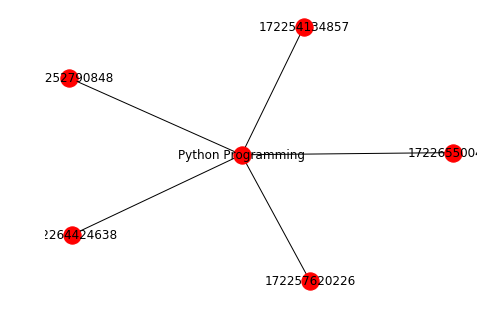

In [37]:
# Draw the graph with node labels
labels = dict((node, data["Label"]) for node, data in nx_graph.nodes(data=True))
nx.draw(nx_graph, labels=labels)

In [38]:
pos = nx.spring_layout(nx_graph)
edge_labels = {}
for edge in nx_graph.edges(data=True):
    key = (edge[0], edge[1])
    edge_labels[key] = edge[2]["Label"]

{('pythonprogrammingthings', '172254134857'): Text(-0.453914,0.225123,'LIKED'),
 ('pythonprogrammingthings', '172252790848'): Text(0.0760794,0.499198,'LIKED'),
 ('pythonprogrammingthings', '172264424638'): Text(0.234233,-0.447743,'LIKED'),
 ('pythonprogrammingthings',
  '172257620226'): Text(-0.352661,-0.362716,'LIKED'),
 ('pythonprogrammingthings', '172265500472'): Text(0.500499,0.0829291,'LIKED')}

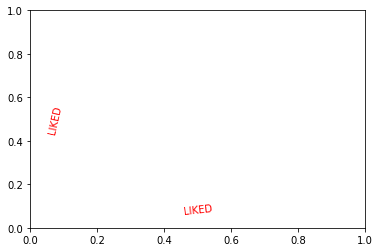

In [39]:
# Draw networkx labels
nx.draw_networkx_edge_labels(nx_graph, pos, edge_labels=edge_labels, font_color="red")